# Travelling Salesman Problem

<p style="text-indent: 1.5em">외판원 문제(travelling salesman problem, TSP)는 <a href="https://en.wikipedia.org/wiki/Combinatorial_optimization" target="_blank">조합 최적화(combinatorial optimization)</a>에서 대표적인 문제로 <a href="https://en.wikipedia.org/wiki/NP-hardness" target="_blank">NP-hard</a>에 속하며 계산 복잡도 이론에서 해를 구하기 어려운 문제입니다. 이 문제는 여러 도시가 존재하고 한 도시에서 다른 도시로 이동하는 비용이 주어졌을 때, 모든 도시를 한 번씩만 방문하고 처음 출발했던 도시로 되돌아오는 총비용 또는 총거리를 최소화하는 경로를 결정하는 것입니다. 이러한 문제를 대칭 외판원 문제(symmetric travelling salesman problem)라고도 하며 <b>Figure 1</b>과 같이 대칭 행렬을 뜻합니다. 예를 들면, 도시 간 거리를 단위 킬로미터(km)라하고 행을 출발도시 열을 도착도시라고 정의하면 4번 도시에서 7번 도시까지 거리는 11km입니다.</p>

<div style="text-align: center; padding-top: 1em; padding-bottom: 1em;"><img src="../images/tsp-01.png" width="40%" /><br><b>Figure 1.</b> Symmetric matrix</div>

<p style="text-indent: 1.5em">외판원 문제는 도시 수가 많아지면 급격하게 어려워지는데 $n$개의 도시가 있을 때 실행 가능한 경로의 수는 출발 도시를 고려하여 $(n-1)!/2$개입니다. $2$로 나눈 이유는 모든 경로의 역 경로는 동일한 해이기 때문입니다. 그래서 10개의 도시가 있는 외판원 문제는 적어도 $200,000$개의 실행가능한 해를 고려해야 합니다. $20$개의 도시는 약 $10^{16}$개, $50$개의 도시는 약 $10^{62}$개입니다. 다음 <b>Figure 2</b>는 <b>Figure 1</b>의 거리 행렬을 사용하여 경로와 해당 경로의 역은 같은 해임을 보여줍니다.</p>

<div style="text-align:center"><img src="../images/tsp-02.png" width="80%" /><br><b>Figure 2.</b> The same total distance</div><br>

<p style="text-indent: 1.5em">외판원 문제는 다양한 곳에서 활용할 수 있는데, 예를 들면 물류 센터에서 각 소매점으로 상품을 배분할 때 트럭이 방문해야할 최단 경로를 결정해야하는 문제나 많은 부품과 칩이 연결된 회로 기판을 제조하는 회사에서 회로 기판에 구멍을 뚫기 위해 구멍을 뚫는 순서를 효율적으로 정할 수 있습니다.</p>

<p style="text-indent: 1.5em">외판원 문제는 다양한 방법으로 해를 구할 수가 있는데, 다음은 <a href="https://en.wikipedia.org/wiki/Integer_programming" target="_blank">혼합 정수 계획법(mixed integer programming)</a>으로 정식화하여 파이썬과 최적화 라이브러리인 <a href="https://pythonhosted.org/PuLP/" target="_blank">PuLP</a>를 사용해서 외판원 문제의 최적해를 구해보겠습니다.</p>

## SOVLING A TRAVELLING SALESMAN PROBLEM

### Mathematical Modeling

<p style="text-indent: 1.5em">외판원 문제를 정식화하면 $n$개의 도시가 있을 때 인덱스 $i$와 $j$는 $n$개 만큼있으며 파리미터는 거리 $c_{ij}$, 의사결정변수로 $x_{ij}$와 $u_{i}$가 있으며 <b>Miller-Tucker-Zemlin (MTZ)</b> 공식은 다음과 같습니다.</p>

$$x_{ij} = 
\begin{cases}
    1, \; \text{if the route goes from city $i$ to city $j$,}\\
    0, \; \text{otherwise}
\end{cases}$$

$$u_{i} = \text{order city $i$ is visited}$$

<p style="text-indent: 1.5em">위의 의사결정변수와 파라미터를 이용하여 총 거리의 합을 최소화하는 정수 계획법은 다음과 같습니다.</p>



$$\begin{align*}
  & \text{minimize }   &      & \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij}x_{ij} \\[1ex]
  & \text{subject to } & \, & \sum_{i=1}^{n} x_{ij} = 1, & \quad & \forall j = 1, \dots, n\\[1ex]
  &                    & \, & \sum_{j=1}^{n} x_{ij} = 1, & \quad & \forall j = 1, \dots, n\\[1ex]  
  &                    & \, & u_{i} - u_{j} \le N(1-x_{ij})-1 & \quad & \forall i = 2, \dots, n, j=2, \dots, n\\[1ex] 
\end{align*}$$



<p style="text-indent: 1.5em">목적함수는 식(1)과 같습니다. 제약식은 다음과 같습니다. 제약식(2)과 (3)은 각 도시 $j$로 들어오는 도시는 1개가 되어야만 하고 각 도시 $i$에서 출발하는 도시는 1개가 되어야 한다는 걸 나타냅니다. 제약식(3)은 부등식 제약조건(inequality constraints)으로 MTZ 공식입니다. $x_{ij}=1$일 때, $(i,j)$에 대한 두 도시 사이는 순서는 $u_{j} \ge u_{i}$를 뜻합니다. 제약식(4)와 (5)는 의사결정변수 $x_{ij}$는 $0$과 $1$ 값만 가질 수 있는 이진변수이고, $u_{i}$는 $0$보다 크거나 같고 $n-1$보다 작거나 같은 값을 가질 수 있는 변수를 나타냅니다.</p>

### Generating Random Cities

<p style="text-indent: 1.5em">외판원 문제의 최적해를 구하기 전, 무작위로 각 도시의 좌표를 생성하고 두 도시 사이의 거리를 유클리드 거리(euclidean distance)로 계산하여 대칭 행렬을 생성하기 위해 클래스로 구현해보겠습니다. 해당 클래스는 앞으로 대표적인 메타휴리스틱스를 구현하기 위해 기본 라이브러리로 사용될 것입니다.</p>

In [1]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


class GenerateCities:
    """Generate Cities
    
    Generating coordinates and distance matrix randomly.
    
    Parameters
    ----------
    x : x coordinate of a city
    y : y coordinate of a city
    num_cities: number of cities
    random_state : seed
    
    Returns
    -------
    coords : city coordinates 
    matrix : distance numpy matrix
    """
    def __init__(self, x, y, num_cities, random_state=None):
        self.x = x
        self.y = y
        self.num_cities = num_cities
        self.random_state = random_state

    def generate(self):
        np.random.seed(self.random_state)
        x = np.random.randint(self.x, size=self.num_cities)
        y = np.random.randint(self.y, size=self.num_cities)
        coords = np.column_stack((x, y))
              
        return coords, np.int32(euclidean_distances(coords))

In [2]:
coords, cities = GenerateCities(100, 100, 10, 42).generate()
cities

array([[  0,  42,  73,  87,  66,  46,  91,  35,  62,  55],
       [ 42,   0, 108,  99,  84,  85,  98,  13,  72,  64],
       [ 73, 108,   0,  60,  46,  29,  71,  96,  60,  61],
       [ 87,  99,  60,   0,  21,  71,  11,  86,  27,  35],
       [ 66,  84,  46,  21,   0,  50,  29,  70,  16,  21],
       [ 46,  85,  29,  71,  50,   0,  80,  74,  58,  56],
       [ 91,  98,  71,  11,  29,  80,   0,  86,  29,  36],
       [ 35,  13,  96,  86,  70,  74,  86,   0,  59,  51],
       [ 62,  72,  60,  27,  16,  58,  29,  59,   0,   8],
       [ 55,  64,  61,  35,  21,  56,  36,  51,   8,   0]])

### Mixed Integer Programming using PuLP

<p style="text-indent: 1.5em">이제 파이썬을 활용하여 외판원 문제의 최적해를 구해보겠습니다. 파이썬을 활용한 경영과학(MS/OR)은 추후 기초부터 포스팅을 할 예정입니다.</p>

In [3]:
from pulp import *

# Initialize travelling salesman problem
prob = LpProblem('Travelling Salesman', LpMinimize)

n = len(cities)
indexs = [(i, j) for i in range(n) for j in range(n) if i != j]

# Creating decision variables
x = LpVariable.dicts('x', indexs, cat='Binary')
u = LpVariable.dicts('u', list(range(n)), lowBound=0, upBound=n-1, cat='Continuous')

# Objective function
prob += lpSum([cities[i][j] * x[(i,j)] for i, j in indexs])

# Constraints
for i in range(n):
    prob += lpSum([x[(i,j)] for j in range(n) if i != j]) == 1
    
for j in range(n):
    prob += lpSum([x[(i,j)] for i in range(n) if i != j]) == 1
    
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            prob += u[i] - u[j] + n * x[(i,j)] <= n - 1

# Solve problem
prob.solve()
print(value(prob.objective))

for i in prob.variables():
    if i.name[0] == 'u':
        print(i.name, '=', i.varValue)
    elif i.varValue != 0:
        print(i.name, '=', i.varValue)

296.0
u_1 = 9.0
u_2 = 1.0
u_3 = 3.0
u_4 = 2.0
u_5 = 0.0
u_6 = 4.0
u_7 = 8.0
u_8 = 6.0
u_9 = 7.0
x_(0,_5) = 1.0
x_(1,_0) = 1.0
x_(2,_4) = 1.0
x_(3,_6) = 1.0
x_(4,_3) = 1.0
x_(5,_2) = 1.0
x_(6,_8) = 1.0
x_(7,_1) = 1.0
x_(8,_9) = 1.0
x_(9,_7) = 1.0


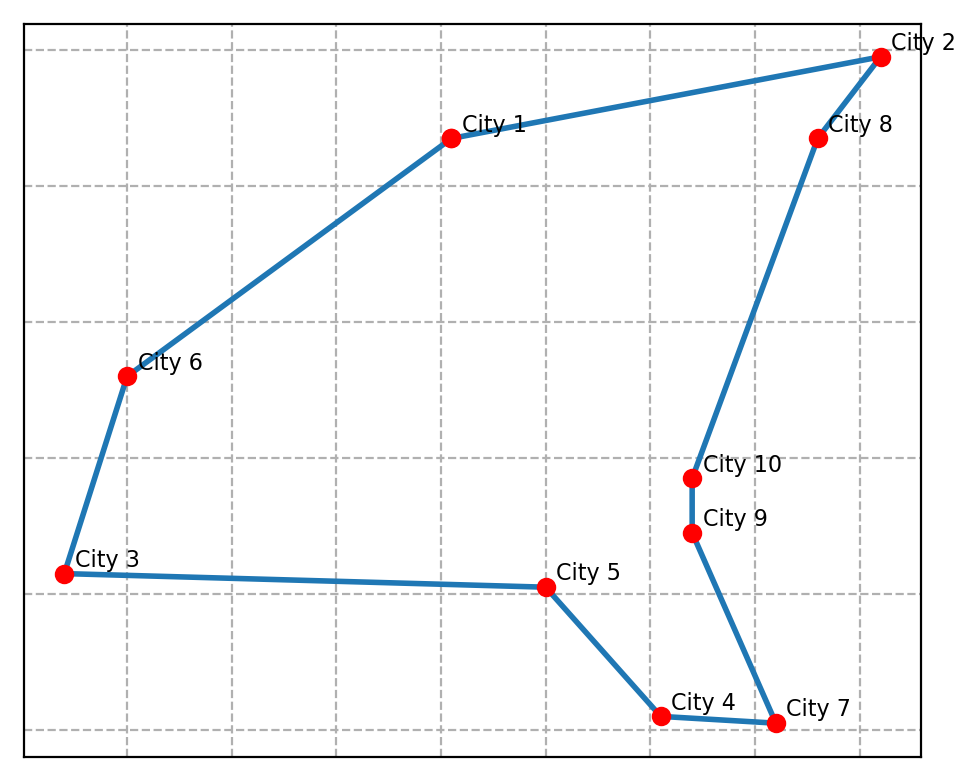

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

visited_cities = [(i, u[i].varValue) for i in range(n) if i != 0]
visited_cities = sorted(visited_cities, key=lambda x: x[1])
visited_cities.insert(0, (0, 0))
visited_cities = [i[0] for i in visited_cities]

x = [coords[i][0] for i in visited_cities + [0]]
y = [coords[i][1] for i in visited_cities + [0]]

plt.figure(figsize=(5,4), dpi=200)
plt.plot(x, y, lw=2)
plt.plot(x, y, 'ro')
for i, j, v in zip(x, y, visited_cities):
    plt.annotate('City {}'.format(v+1), (i,j), xytext=(i+1,j+1), fontsize=8)
plt.grid(axis='both', linestyle='--')
plt.tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
plt.tight_layout()
plt.show()

## CONCLUSION

<p style="text-indent: 1.5em">조합 최적화의 대표적인 문제인 외판원 문제에 대해서 알아보았습니다. 또한, 외판원 문제의 최적해를 도출하기 위해서 혼합 정수 계획법과 완전 탐색을 적용하였고, 합리적인 시간에 근사한 해를 구할 수 있는 휴리스틱한 방법인 최근접 이웃을 파이썬으로 구현했습니다. 외판원 문제는 다양한 알고리즘으로 해를 구할 수 있습니다. 그 중 2016년 Google Brain에서 강화학습(reinforcement learning)으로 조합 최적화 문제를 다루는 논문을 발표했습니다. 논문의 제목은 Neural Combinatorial Optimization with Reinforcement Learning으로 앞으로 메타휴리스틱스 중에서 대표적인 알고리즘인 시뮬레이티드 어닐링, 타부 서치, 유전 알고리즘, 입자 군집 최적화, 개미 군집 최적화 등을 이용해서 외판원 문제를 다뤄보고 구글에서 적용한 강화학습을 파이토치(pytorch)로 구현해보도록 하겠습니다.</p>

<p style="text-indent: 1.5em">해당 포스트는 지속적으로 업데이트 할 예정이니 오타, 틀린부분, 파이써닉(pythonic)하지 못한 코드가 있을 경우 지적해주시면 수정하도록 하겠습니다.</p>

## REFERENCES

1. https://en.wikipedia.org/wiki/Travelling_salesman_problem
2. https://en.wikipedia.org/wiki/Nearest_neighbour_algorithm
3. 이강우 & 김정자 (2010). _경영과학_, 한경사.
4. Rasmussen, R. (2011). TSP in Spreadsheets–a Guided Tour. _International Review of Economics Education_, 10(1), 94-116.
5. Hillier, F. S. & Lieberman, G. J. (2013). _Introduction to Operations Research_. McGraw-Hill Science, Engineering & Mathematics.
6. Bello, I., Pham, H., Le, Q. V., Norouzi, M., & Bengio, S. (2016). Neural Combinatorial Optimization with Reinforcement Learning. _arXiv preprint arXiv:1611.09940_.